<H1>1.7. Six degrees of separation.</H1>

(Sethna, "Entropy, Order Parameters, and Complexity", ex. 1.7, developed with Piet Brouwer)

Â© 2016, James Sethna, all rights reserved.


<br/>
2024.10.1. Jungeun Kim

Main reference: https://cac.cornell.edu/myers/teaching/ComputationalMethods/ComputerExercises/SmallWorld/SmallWorld.html

In [4]:
# Simple test routines

# <codecell>
def pentagraph():
    """pentagraph() creates a simple 5-node UndirectedGraph, and then uses
    the imported NetGraphics module to layout and display the graph.
    The graph is returned from the function.
    """
    g = UndirectedGraph()
    g.AddEdge(0,2)
    g.AddEdge(0,3)
    g.AddEdge(1,3)
    g.AddEdge(1,4)
    g.AddEdge(2,4)
    NetGraphics.DisplayCircleGraph(g)
    return g

# <codecell>
def circle8():
    """circle8() creates an 8-node UndirectedGraph, where the nodes are
    arranged in a circle (ring), and then uses the imported NetGraphics
    module to layout and display the graph.  The graph is returned from
    the function.
    """
    g = UndirectedGraph()
    g.AddEdge(0,1)
    g.AddEdge(1,2)
    g.AddEdge(2,3)
    g.AddEdge(3,4)
    g.AddEdge(4,5)
    g.AddEdge(5,6)
    g.AddEdge(6,7)
    g.AddEdge(7,0)
    NetGraphics.DisplayCircleGraph(g)
    return g


# ***** After building and testing your network class, build some    ***** #
# ***** Small World or Percolation networks, making use of the       ***** #
# ***** corresponding hints file. Then return to analyze these       ***** #
# ***** networks using the general-purpose routines you write below. ***** #

# ***** Small World exercise routines start here                     ***** #

# -----------------------------------------------------------------------
#
# Routines for finding path lengths on graphs: used by the Small World
# Network exercise only
#
# -----------------------------------------------------------------------

def FindPathLengthsFromNode(graph, node):
    """Breadth--first search. See "Six degrees of separation" exercise
    from Sethna's book.  Use a dictionary to store the distance to
    each node visited.  Keys in the dictionary thus serve as markers
    of nodes that have already been visited, and should not be considered
    again."""
    pass

def FindAllPathLengths(graph):
    """
    FindAllPathLengths returns a dictionary, indexed by node pairs,
    storing the shortest path length between those nodes, e.g. for
    small-world networks
    """
    pass

def FindAveragePathLength(graph):
    """Averages path length over all pairs of nodes"""
    pass

# -----------------------------------------------------------------------
#
# Routine for calculating the clustering coefficient of a graph.
# This was a piece of the original Small World paper, but is not part of the 
# assigned exercise.
#
# -----------------------------------------------------------------------

def ComputeClusteringCoefficient(graph):
    """Computes clustering coefficient of graph"""
    pass

# -----------------------------------------------------------------------
#
# Routines for calculating "betweenness", which measures how many shortest
# paths between pairs of nodes on a graph pass through a given node or edge.
# Used in the Small Worlds exercise.
#
# References: (on the Web site)
# Mark E. J. Newman, "Scientific collaboration networks. ii. shortest paths,
# weighted networks, and criticality", Physical Review E 64: 016132, 2002.
# Michelle Girvan and Mark E. J. Newman, "Community structure in social
# and biological networks. Proceedings of the National Academy of Sciences
# 12, 7821-7826, 2002.
#
# -----------------------------------------------------------------------

def EdgeAndNodeBetweennessFromNode(graph, node):
    """
    Newman's edge and node betweenness inner loop
    Returns partial sum of edge, node betweenness
    """
    pass

def EdgeAndNodeBetweenness(graph):
    """Returns Newman's edge, node betweenness"""
    pass

# -----------------------------------------------------------------------
#
# Sample routines for reading in external files defining networks. Used
# primarily for the later portions of the Small World exercise.
#
# -----------------------------------------------------------------------

def ReadGraphFromEdgeFile(filename, conversion=None):
    """Reads file with (node1,node2) for each edge in graph"""
    pass

def ReadGraphFromNeighborFile(filename, conversion=None):
    """
    Reads file with [node1,node2,node3] for completely interconnected
    group of nodes (as in actors in a movie)
    Should be read in as a bipartite graph!
    """
    pass


# ***** Percolation exercise routines start here                     ***** #
# -----------------------------------------------------------------------
#
# Routines for finding clusters in networks. Used in the Percolation exercise.
#
# -----------------------------------------------------------------------

def FindClusterFromNode(graph, node, visited=None):
    """Breadth--first search
    The dictionary "visited" should be initialized to False for
    all the nodes in the cluster you wish to find
    It's used in two different ways.
    (1) It's passed back to the
        calling program with all the nodes in the current cluster set to
        visited[nodeInCluster]=True, so that the calling program can skip
        nodes in this cluster in searching for other clusters.
    (2) It's used internally in this algorithm to keep track of the
        sites in the cluster that have already been found and incorporated
    See "Building a Percolation Network" in text for algorithm"""
    pass

def FindAllClusters(graph):
    """For example, find percolation clusters
    Set up the dictionary "visited" for FindClusterFromNode
    Set up an empty list "clusters"
    Iterate over the nodes;
        if it haven't been visited,
            find the cluster containing it
            append it to the cluster list
        return clusters
    Check your answer using
    NetGraphics.DrawSquareNetworkBonds(g, cl) and
    NetGraphics.DrawSquareNetworkSites(g, cl)
					            
    Optional: You may wish to sort your list of clusters according to their
    lengths, biggest to smallest
    For a list ell, the built-in method ell.sort() will sort the list
    from smallest to biggest;
    ell.sort(cmp) will sort the list according to the comparison function
    cmp(x, y) returns -1 if x < y, returns 0 if x==y, and returns 1 if x>y
    Define ReverseLengthCompare to compare two lists according to the
    unusual definition of inequality, l1<l2 if # len(l1) > len(l2)!
    """
    pass

def GetSizeDistribution(clusters):
    """Given the clusters, makes up a dictionary giving the number
    of clusters of a given size.
    """
    pass

# Copyright (C) Cornell University
# All rights reserved.
# Apache License, Version 2.0



In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import random
import math
# import NetGraphics  # a separate module supporting network visualization
import imp
# from collections import

## (a)
Define a network object on the computer. For this exercise, the nodes will be represented by integers. Implement a network class, with five functions:
* `HasNode(node)`, which checks to see if a node is already in the network;
* `AddNode(node)`, which adds a new node to the system (if it is not already there);
* `AddEdge(node1, node2)`, which adds a new edge to the system;
* `GetNodes()`, which returns a list of existing nodes; and
* `GetNeighbors(node)`, which returns the neighbors of an existing node.

In [9]:
class UndirectedGraph :
    """An UndirectedGraph g contains a dictionary (g.connections) that
    maps a node identifier (key) to a list of nodes connected to (values).
    g.connections[node] returns a list [node2, node3, node4] of neighbors.
    Node identifiers can be any non-mutable Python type (e.g., integers,
    tuples, strings, but not lists).
    """

    def __init__(self) :
        """UndirectedGraph() creates an empty graph g.
	    g.connections starts as an empty dictionary.  When nodes are
	    added, the corresponding values need to be inserted into lists.

        A method/function definition in a class must begin with an instance
        of the class in question; by convention, the name "self" is used for
        this instance."""
        self.connections = {}


    def HasNode(self, node) :
        """Returns True if the graph contains the specified node, and
        False otherwise.  Check directly to see if the dictionary of
        connections contains the node, rather than (inefficiently)
        generating a list of all nodes and then searching for the
        specified node."""
        return node in self.connections


    def AddNode(self, node) :
	    # Uses HasNode(node) to determine if node has already been added.
        if HasNode(node) == False :
            self.connections[node] = []


    def AddEdge(self, node1, node2) :
        """
        Add node1 and node2 to network first
        Adds new edge 
        (appends node2 to connections[node1] and vice-versa, since it's
        an undirected graph)
        Do so only if old edge does not already exist 
        (node2 not in connections[node1])
        """
        self.AddNode(node1)
        self.AddNode(node2)
        if node2 in self.connections[node1] == False :
            self.connections[node1].append(node2)
        if node1 in self.connections[node2] == False :
            self.connections[node2].append(node1)


    def GetNodes(self):
        """g.GetNodes() returns all nodes (keys) in connections"""
        return list(self.connections.keys())


    def GetNeighbors(self, node):
        """g.GetNeighbors(node) returns a copy of the list of neighbors of
        the specified node.  A copy is returned (using the [:] operator) so
	    that the user does not inadvertently change the neighbor list."""
        return self.connections[node]



['A', 'B', 'D']


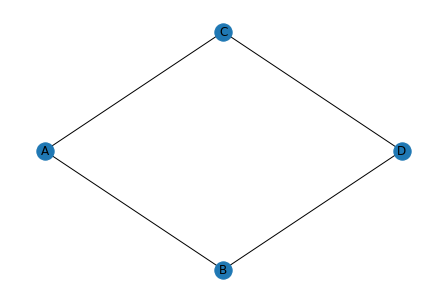

In [14]:
G = nx.Graph()
G.add_edge("A", "B", weight=4)
G.add_edge("B", "D", weight=2)
G.add_edge("A", "C", weight=3)
G.add_edge("C", "D", weight=4)
print(nx.shortest_path(G, "A", "D", weight="weight"))
nx.draw_shell(G, with_labels = True)

## (b)
* `FindPathLengthsFromNode(graph, node)`
* `FindAllPathLengths(graph)`<br/>
It generates a list of all lengths (one per pair of nodes in the graph) by repeatedly using FindPathLengthsFromNode. Check your function by testing that the histogram of path lengths at p = 0 is constant for 0 < l < L/Z, as advertised. Generate graphs at L = 1,000 and Z =2 for p=0.02 and p=0.2; display the circle graphs and plot the histogram of path lengths. Zoom in on the histogram; how much does it change with p? What value of p would you need to get “six degrees of separation”?
* `FindAveragePathLength(graph)`<br/>
It computes the mean ⟨l⟩ over all pairs of nodes. Compute $l$ for $Z = 2$, $L = 100$, and $p = 0.1$ a few times; your answer should be around $l = 10$. Notice that there are substantial statistical fluctuations in the value from sample to sample. Roughly how many long bonds are there in this system? Would you expect fluctuations in the distances?

In [ ]:
def FindPathLengthsFromNode(graph, node) :
    nx.shortest_path()

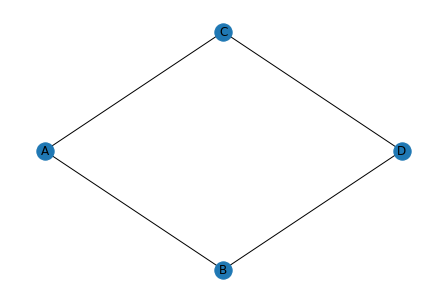

In [11]:
def FindAllPathLengths(graph) :
    